In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
citibike_df_1 = pd.read_csv("../data/202508-citibike-tripdata/202508-citibike-tripdata_1.csv", parse_dates=["started_at", "ended_at"], dtype={"start_station_id": str, "end_station_id": str})

In [5]:
citibike_df_1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1527BC87374D7267,electric_bike,2025-08-05 12:38:34.768,2025-08-05 12:47:13.228,75 St & Northern Blvd,6527.07,Ditmars Blvd & 94 St,6978.04,40.754730,-73.891800,40.770200,-73.875870,member
1,DB20D4A778A0054A,classic_bike,2025-08-10 20:45:40.270,2025-08-10 20:50:35.171,Riverside Dr & W 145 St,8018.04,Riverside Dr E & W 155 St,8142.03,40.827305,-73.951989,40.834098,-73.948350,member
2,97EAB930B90356B8,electric_bike,2025-08-08 08:36:41.894,2025-08-08 08:42:58.061,N 7 St & Driggs Ave,5340.01,Monitor St & Meeker Ave,5473.06,40.716967,-73.956388,40.721226,-73.941845,member
3,CC3E01200770DA87,electric_bike,2025-08-06 19:09:35.004,2025-08-06 19:20:02.434,Park Ave & E 41 St,6432.08,E 15 St & 3 Ave,5863.07,40.751581,-73.977910,40.734232,-73.986923,member
4,5BE4BFABDAFCCE5A,electric_bike,2025-08-03 12:28:55.029,2025-08-03 12:37:25.051,McKibbin St & Manhattan Ave,4996.08,N 6 St & Bedford Ave,5379.10,40.705109,-73.944073,40.717452,-73.958509,member


In [9]:
citibike_df_1.iloc[0].ended_at - citibike_df_1.iloc[0].started_at

Timedelta('0 days 00:08:38.460000')

In [10]:
condensed_df = citibike_df_1[["ride_id", "rideable_type"]]
condensed_df.head()

,ride_id,rideable_type
0,1527BC87374D7267,electric_bike
1,DB20D4A778A0054A,classic_bike
2,97EAB930B90356B8,electric_bike
3,CC3E01200770DA87,electric_bike
4,5BE4BFABDAFCCE5A,electric_bike


In [12]:
citibike_df_1.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [225]:
condensed_df["length of trip (seconds)"] = (citibike_df_1.ended_at - citibike_df_1.started_at).dt.total_seconds().copy()
condensed_df.head()

C:\Users\Jon\AppData\Local\Temp\ipykernel_7324\2860939691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condensed_df["length of trip (seconds)"] = (citibike_df_1.ended_at - citibike_df_1.started_at).dt.total_seconds().copy()


,ride_id,rideable_type,length of trip (seconds),trip_distance_m
0,1527BC87374D7267,electric_bike,518.460,2181.527606
1,DB20D4A778A0054A,classic_bike,294.901,815.045243
2,97EAB930B90356B8,electric_bike,376.167,1313.946173
3,CC3E01200770DA87,electric_bike,627.430,2073.176905
4,5BE4BFABDAFCCE5A,electric_bike,510.022,1834.168401


In [14]:
# Use Haversine formulat to get meters from longitude/lattitude
R = 6371000.0  # Earth radius in meters (mean)

lat1 = np.radians(citibike_df_1['start_lat'].astype(float))
lon1 = np.radians(citibike_df_1['start_lng'].astype(float))
lat2 = np.radians(citibike_df_1['end_lat'].astype(float))
lon2 = np.radians(citibike_df_1['end_lng'].astype(float))

dlat = lat2 - lat1
dlon = lon2 - lon1

a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

condensed_df['trip_distance_m'] = R * c

C:\Users\Jon\AppData\Local\Temp\ipykernel_7324\4268486304.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condensed_df['trip_distance_m'] = R * c


In [15]:
condensed_df.head()

,ride_id,rideable_type,length of trip (seconds),trip_distance_m
0,1527BC87374D7267,electric_bike,518.460,2181.527606
1,DB20D4A778A0054A,classic_bike,294.901,815.045243
2,97EAB930B90356B8,electric_bike,376.167,1313.946173
3,CC3E01200770DA87,electric_bike,627.430,2073.176905
4,5BE4BFABDAFCCE5A,electric_bike,510.022,1834.168401


In [28]:
# Classic bikes
classic_df = condensed_df[condensed_df['rideable_type'] == 'classic_bike'].copy()

# Electric bikes
electric_df = condensed_df[condensed_df['rideable_type'] == 'electric_bike'].copy()

In [29]:
classic_df.head()

,ride_id,rideable_type,length of trip (seconds),trip_distance_m
1,DB20D4A778A0054A,classic_bike,294.901,815.045243
7,DAF4F128DCA9474D,classic_bike,776.219,948.906179
8,2CBE8BB8B5B1584C,classic_bike,972.210,2371.479315
12,314B15040B7F3BFC,classic_bike,710.473,1189.980833
13,D3C8A1FF6C8161F5,classic_bike,372.366,272.388685


In [30]:
electric_df.head()

,ride_id,rideable_type,length of trip (seconds),trip_distance_m
0,1527BC87374D7267,electric_bike,518.460,2181.527606
2,97EAB930B90356B8,electric_bike,376.167,1313.946173
3,CC3E01200770DA87,electric_bike,627.430,2073.176905
4,5BE4BFABDAFCCE5A,electric_bike,510.022,1834.168401
5,4AA5E2DE40359E0C,electric_bike,779.371,1119.154235


In [49]:
len(electric_df)

696363

In [222]:
# Drop data pointas where distance is less than 50, most likely instances where rider doesn't actually ride for technical reasons and we want to ignore for the regression
electric_df = electric_df[electric_df["trip_distance_m"] > 50]

# Remove outlier durations, again most likely due to people leaving citibikes and not riding or technical issues
# Drop data pointas where distance is 0, most likely instances where rider doesn't actually ride for technical reasons and we want to ignore for the regression
electric_df = electric_df[electric_df["length of trip (seconds)"] < 7200]

electric_df = electric_df[electric_df["trip_distance_m"] / electric_df["length of trip (seconds)"] > 2]
electric_df.head()

,ride_id,rideable_type,length of trip (seconds),trip_distance_m
0,1527BC87374D7267,electric_bike,518.460,2181.527606
2,97EAB930B90356B8,electric_bike,376.167,1313.946173
3,CC3E01200770DA87,electric_bike,627.430,2073.176905
4,5BE4BFABDAFCCE5A,electric_bike,510.022,1834.168401
6,978AFCF80CD88BB7,electric_bike,510.706,1313.946173


In [213]:
sample_electric = electric_df.sample(4000)

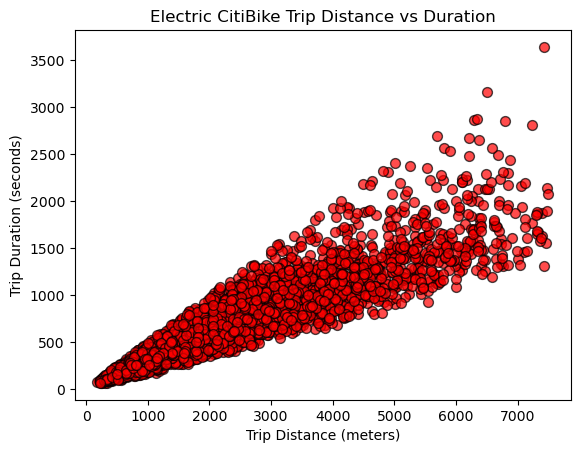

In [214]:
plt.scatter(sample_electric["trip_distance_m"], sample_electric["length of trip (seconds)"], color='red', s=50, alpha=0.7, edgecolors='black')
plt.xlabel('Trip Distance (meters)')
plt.ylabel('Trip Duration (seconds)')
plt.title('Electric CitiBike Trip Distance vs Duration')
plt.show()

In [215]:
def compute_model_output(x, w, b):
    return w*x + b

In [216]:
def compute_cost(x, y_target, w, b):
    y_pred = compute_model_output(x, w, b)
    squared_diff = (y_pred - y_target) ** 2
    return np.mean(squared_diff) / 2
compute_cost(sample_electric["trip_distance_m"], sample_electric["length of trip (seconds)"], 100, 200)

np.float64(38304911678.42827)

In [231]:
def compute_gradient(x, y_target, w, b):
    # Derivative of cost function w.r.a. to w
    dj_dw = np.sum(((compute_model_output(x, w, b) - y_target) * x)) / len(x)
    # Derivative of cost function w.r.a. to b
    dj_db = np.sum((compute_model_output(x, w, b) - y_target)) / len(x)
    return (dj_dw, dj_db)

In [229]:
def compute_gradient_descent(x, y_target, w_in, b_in, alpha, iterations):
    w = w_in
    b = b_in
    for _ in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y_target, w, b)
        print(f"dw = {dj_dw} db = {dj_db} alpha = {alpha}")
        print(f"w = {w} b = {b}")
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    print(f"dw = {dj_dw} db = {dj_db}")
    # print(f"cost = {compute_cost(x, y_target, w, b)}")
    return w, b

In [230]:
x_mean = sample_electric['trip_distance_m'].mean()
x_std = sample_electric['trip_distance_m'].std()
x_scaled = (sample_electric['trip_distance_m'] - x_mean) / x_std
# Run gradient descent on scaled input
w_scaled, b_scaled = compute_gradient_descent(x_scaled, sample_electric['length of trip (seconds)'], 0, 0, alpha=0.05, iterations=5000)

# Convert back to original units
w_orig = w_scaled / x_std
b_orig = b_scaled - (w_scaled * x_mean / x_std)
np.sqrt(compute_cost(sample_electric['trip_distance_m'], sample_electric["length of trip (seconds)"], w_orig, b_orig) * 2)

dw = -410.32760246118676 db = -671.5050305 alpha = 0.05
w = 0 b = 0
dw = -389.8163514331583 db = -637.929778975 alpha = 0.05
w = 20.51638012305934 b = 33.575251525
dw = -370.3304065658933 db = -606.0332900262499 alpha = 0.05
w = 40.00719769471725 b = 65.47174047375
dw = -351.8185153676807 db = -575.7316255249375 alpha = 0.05
w = 58.52371802301192 b = 95.7734049750625
dw = -334.23198733073883 db = -546.9450442486906 alpha = 0.05
w = 76.11464379139595 b = 124.55998625130938
dw = -317.52456586404355 db = -519.5977920362561 alpha = 0.05
w = 92.8262431579329 b = 151.9072384637439
dw = -301.65230662791464 db = -493.6179024344433 alpha = 0.05
w = 108.70247145113507 b = 177.8871280655567
dw = -286.5734619503518 db = -468.93700731272116 alpha = 0.05
w = 123.7850867825308 b = 202.56802318727887
dw = -272.2483710211087 db = -445.4901569470851 alpha = 0.05
w = 138.11375988004838 b = 226.01487355291493
dw = -258.639355574691 db = -423.2156490997309 alpha = 0.05
w = 151.72617843110382 b = 248.289381

np.float64(185.6156170803021)

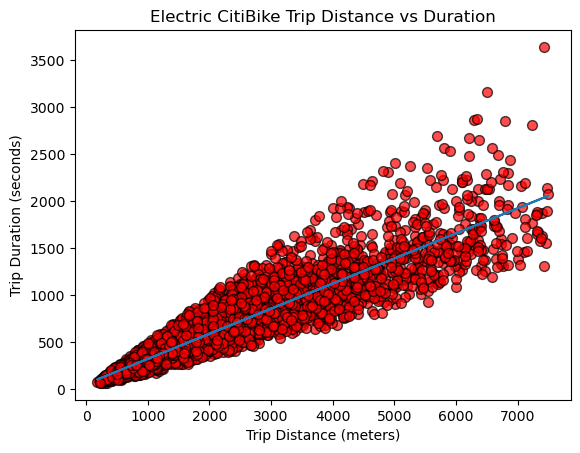

In [220]:
plt.scatter(sample_electric["trip_distance_m"], sample_electric["length of trip (seconds)"], color='red', s=50, alpha=0.7, edgecolors='black')
plt.plot(sample_electric["trip_distance_m"], compute_model_output(sample_electric["trip_distance_m"], w_orig, b_orig))
plt.xlabel('Trip Distance (meters)')
plt.ylabel('Trip Duration (seconds)')
plt.title('Electric CitiBike Trip Distance vs Duration')
plt.show()

In [221]:
(8368.64 * w_orig + b_orig) / 60

np.float64(38.13662156268004)